<a href="https://colab.research.google.com/github/Artemis601/ML/blob/master/Investment_portfolio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I try to use methods of quantitative risk management taught at Datacamp by Dr.Jamsheed Shorish

Chapter 1: Risk and Return

In [0]:
import pandas as pd
import numpy as np
import datetime


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf


In [0]:
start_sp= datetime.datetime(2006,1,1)
end_sp= datetime.datetime(2011,3,9)

The ticker for S&P 500 is ^GSPC as found in Yahoo! Finance

In [0]:
sp500= pdr.get_data_yahoo('^GSPC', start_sp, end_sp)

In [6]:
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,1270.219971,1245.739990,1248.290039,1268.800049,2554570000,1268.800049
2006-01-04,1275.369995,1267.739990,1268.800049,1273.459961,2515330000,1273.459961
2006-01-05,1276.910034,1270.300049,1273.459961,1273.479980,2433340000,1273.479980
2006-01-06,1286.089966,1273.479980,1273.479980,1285.449951,2446560000,1285.449951
2006-01-09,1290.780029,1284.819946,1285.449951,1290.150024,2301490000,1290.150024


1. HDFC Bank Limited (HDB), USD
2. State Bank of India (SBIN.NS) ; NSE - NSE Real Time Price. Currency in INR
3. American Express Company (AXP) ;NYSE - NYSE Delayed Price. Currency in USD


In [0]:
# creating a dynamic list of tickers to pull from Yahoo Finance


In [0]:
hdfc= pdr.get_data_yahoo('HDB', start_sp, end_sp)
sbi= pdr.get_data_yahoo('SBIN.NS', start_sp, end_sp)
amex= pdr.get_data_yahoo('AXP', start_sp, end_sp)

In [9]:
hdfc= hdfc.add_prefix('hdfc_')
hdfc.head()

,hdfc_High,hdfc_Low,hdfc_Open,hdfc_Close,hdfc_Volume,hdfc_Adj Close
Date,,,,,,
2006-01-03,5.253,5.121,5.129,5.240,2388000.0,3.260870
2006-01-04,5.350,5.235,5.235,5.339,1180000.0,3.322477
2006-01-05,5.374,5.306,5.325,5.356,692000.0,3.333057
2006-01-06,5.479,5.400,5.402,5.456,1544000.0,3.395287
2006-01-09,5.566,5.385,5.441,5.566,3079000.0,3.463741


In [10]:
sbi= sbi.add_prefix('sbi_')
sbi.head()

,sbi_High,sbi_Low,sbi_Open,sbi_Close,sbi_Volume,sbi_Adj Close
Date,,,,,,
2006-01-02,86.591599,85.119698,86.096298,85.379204,21240601.0,18.207844
2006-01-03,86.332199,85.483002,85.681099,86.053802,17462402.0,18.351706
2006-01-04,87.086998,86.398201,86.398201,86.605797,19420938.0,18.469419
2006-01-05,89.205200,86.728401,86.954903,88.813599,42574672.0,18.940254
2006-01-06,89.634499,87.855904,88.785301,88.705101,23846596.0,18.917118


In [11]:
amex= amex.add_prefix('amex_')
amex.head()

,amex_High,amex_Low,amex_Open,amex_Close,amex_Volume,amex_Adj Close
Date,,,,,,
2006-01-03,52.580002,51.049999,51.700001,52.580002,7825700.0,41.785267
2006-01-04,52.570000,51.810001,52.439999,51.950001,5729400.0,41.379032
2006-01-05,52.509998,51.900002,51.900002,52.500000,3925800.0,41.817112
2006-01-06,52.869999,52.279999,52.639999,52.680000,4137800.0,41.960484
2006-01-09,53.990002,52.820000,52.820000,53.990002,6093300.0,43.003925


In [12]:
sp500 = sp500.add_prefix('sp500_')
amex.head()

,amex_High,amex_Low,amex_Open,amex_Close,amex_Volume,amex_Adj Close
Date,,,,,,
2006-01-03,52.580002,51.049999,51.700001,52.580002,7825700.0,41.785267
2006-01-04,52.570000,51.810001,52.439999,51.950001,5729400.0,41.379032
2006-01-05,52.509998,51.900002,51.900002,52.500000,3925800.0,41.817112
2006-01-06,52.869999,52.279999,52.639999,52.680000,4137800.0,41.960484
2006-01-09,53.990002,52.820000,52.820000,53.990002,6093300.0,43.003925


In [0]:
asset_prices= pd.concat([hdfc['hdfc_Adj Close'], sbi['sbi_Adj Close'],amex['amex_Adj Close']], axis=1).dropna()

In [0]:
asset_returns= asset_prices.pct_change()

In [15]:
asset_returns.head()

,hdfc_Adj Close,sbi_Adj Close,amex_Adj Close
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,0.018893,0.006414,-0.009722
2006-01-05,0.003184,0.025493,0.010587
2006-01-06,0.018671,-0.001222,0.003429
2006-01-09,0.020161,-0.014040,0.024867


In [0]:
weights= [.25, 0.5,.25]

In [0]:
port_returns= asset_returns.dot(weights)

Text(0, 0.5, 'Portfolio Returns')

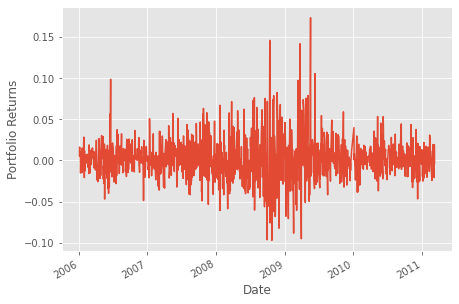

In [18]:
plt.figure(figsize=(7,5))
port_returns.plot().set_ylabel('Portfolio Returns')

In [0]:
# covariance matrix
covariance= asset_returns.cov()
covariance= covariance*252

In [20]:
covariance

,hdfc_Adj Close,sbi_Adj Close,amex_Adj Close
hdfc_Adj Close,0.325370,0.110553,0.183370
sbi_Adj Close,0.110553,0.215346,0.044140
amex_Adj Close,0.183370,0.044140,0.265873


In [0]:
# portfolio variance
port_variance= np.transpose(weights)@covariance@weights

In [0]:
port_volatility= np.sqrt(port_variance)

In [23]:
port_volatility

0.3903635277936897

In [0]:
# calculate 30 day window of portfolio returns
port_returns_window = port_returns.rolling(window = 30)

In [0]:
# compute annualized volatility series
port_volatility = port_returns_window.std()*np.sqrt(252)

Text(0, 0.5, 'Annualized volatility, 30 day rolling period')

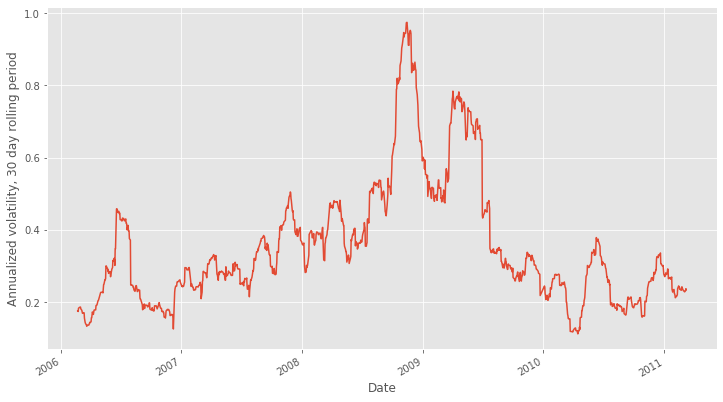

In [26]:
plt.figure(figsize=(12,7))
port_volatility.plot().set_ylabel('Annualized volatility, 30 day rolling period')

We install the library using the following command

pip install PyPortfolioOpt

and import mean_historical_return method

In [0]:
from pypfopt.expected_returns import mean_historical_return

In [0]:
# compute annualized average historical return
mean_returns = mean_historical_return(asset_prices, frequency=252)

Text(0, 0.5, 'Mean Returns')

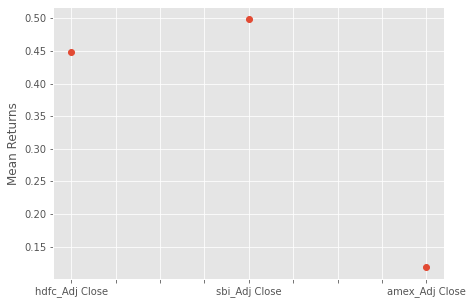

In [49]:
mean_returns.plot(linestyle= 'None', marker='o', figsize=(7,5)).set_ylabel('Mean Returns')

Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance. Although sample covariance is unboased, it is not efficient as extreme events tend to be overweighted. 

One approach to alleviate this is through 'covariance shrinkage' where large errors are reduced/shrunk to improve efficiency.

We first import the covariance shrinkage object. Note that although the CovarianceShrimnkage object takes prices as input, it actually calcualtes the covariance matrix of asset returns and not the prices

We later display both the coviance matrix before and after ledoit wolf shrinkage

In [0]:
from pypfopt.risk_models import CovarianceShrinkage
cs= CovarianceShrinkage(asset_prices)

In [0]:
e_cov= cs.ledoit_wolf()

In [56]:
print('Covariance matrix \n ', covariance,'\n')
print('Efficient Covariance matrix \n', e_cov,'\n')

Covariance matrix 
                  hdfc_Adj Close  sbi_Adj Close  amex_Adj Close
hdfc_Adj Close        0.325370       0.110553        0.183370
sbi_Adj Close         0.110553       0.215346        0.044140
amex_Adj Close        0.183370       0.044140        0.265873 

Efficient Covariance matrix 
                 hdfc_Adj Close  sbi_Adj Close  amex_Adj Close
hdfc_Adj Close        0.323552       0.107422        0.178175
sbi_Adj Close         0.107422       0.216645        0.042889
amex_Adj Close        0.178175       0.042889        0.265741 



Althought the difference between the covariance before and after shrinkage seem small, they have a hige impact on the estimation of portfolio weigths and the generation of efficient frontier. 

Practioners generally use some form of efficient covariance for Modern Portfolio Theory.

Breaking down the financial crisis periods into three sub-periods
1. 2005-2006
2. 2007-2008
3. 2009-2010

In [0]:
# create a dictionary of time periods 
epochs= {'before': {'start': '1-1-2005','end':'31-12-2006' }, 
         'during': {'start': '1-1-2007', 'end': '31-12-2008'}, 
         'after':{'start':'1-1-2009', 'end': '31-12-2010'}}

In [0]:
# compute efficient frontier for each epoch
e_covariance={}
returns={}
for x in epochs.keys():
  sub_price= asset_prices.loc[ epochs[x]['start']: epochs[x]['end']]
  returns[x]= sub_price.pct_change().mean()
  e_covariance[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
  

In [72]:
print('Efficient Covariance matrices \n ')
e_covariance

Efficient Covariance matrices 
 


{'after':                 hdfc_Adj Close  sbi_Adj Close  amex_Adj Close
 hdfc_Adj Close        0.266083       0.101851        0.171581
 sbi_Adj Close         0.101851       0.199546        0.047518
 amex_Adj Close        0.171581       0.047518        0.328939,
 'before':                 hdfc_Adj Close  sbi_Adj Close  amex_Adj Close
 hdfc_Adj Close        0.149304       0.027167        0.019337
 sbi_Adj Close         0.027167       0.147949       -0.000704
 amex_Adj Close        0.019337      -0.000704        0.045709,
 'during':                 hdfc_Adj Close  sbi_Adj Close  amex_Adj Close
 hdfc_Adj Close        0.479458       0.145321        0.262514
 sbi_Adj Close         0.145321       0.276813        0.059643
 amex_Adj Close        0.262514       0.059643        0.335336}

In [87]:
returns

{'after': hdfc_Adj Close    0.002401
 sbi_Adj Close     0.002636
 amex_Adj Close    0.002443
 dtype: float64, 'before': hdfc_Adj Close    0.002088
 sbi_Adj Close     0.002508
 amex_Adj Close    0.000692
 dtype: float64, 'during': hdfc_Adj Close    0.001121
 sbi_Adj Close     0.001268
 amex_Adj Close   -0.001740
 dtype: float64}

Now let's visualize the efficient frontier

In [85]:
e_covariance['during']

,hdfc_Adj Close,sbi_Adj Close,amex_Adj Close
hdfc_Adj Close,0.479458,0.145321,0.262514
sbi_Adj Close,0.145321,0.276813,0.059643
amex_Adj Close,0.262514,0.059643,0.335336


In [0]:
from pypfopt.cla import CLA

In [0]:
# initialize the critical line algorithm object
efficient_portfolio_during = CLA(returns['during'], e_covariance['during'])
efficient_portfolio_before = CLA(returns['before'], e_covariance['before'])
efficient_portfolio_after = CLA(returns['after'], e_covariance['after'])

In [90]:
# Find minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

OrderedDict([('hdfc_Adj Close', 0.0), ('sbi_Adj Close', 0.5593702894996971), ('amex_Adj Close', 0.4406297105003028)])


In [0]:
(ret1, vol1, weights1)= efficient_portfolio_during.efficient_frontier()
(ret0, vol0, weights0)= efficient_portfolio_before.efficient_frontier()
(ret2, vol2, weights2)= efficient_portfolio_after.efficient_frontier()

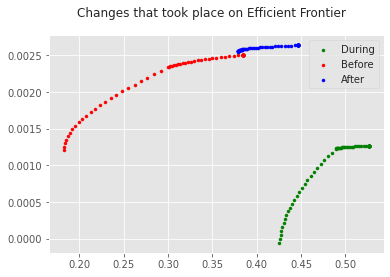

In [102]:
plt.scatter(vol1, ret1, color= 'green', marker= '.', label = 'During')
plt.scatter(vol0, ret0, color= 'red', marker= '.', label = 'Before')
plt.scatter(vol2, ret2, color= 'blue', marker= '.', label = 'After')
plt.suptitle('Changes that took place on Efficient Frontier')
plt.legend()